In [1]:
# توکن مخصوص برای ارتباط با مدل در
# openai
api_key = ''

In [2]:
# تابع ربط به مدل آنلاین
from openai import OpenAI


client = OpenAI(api_key=api_key)
query = f"""
    Your query must be here.
"""

completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "You are a helpful assistant"},
        {"role": "user", "content": query}
    ]
)

def get_reponse(query):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a helpful assistant"},
            {"role": "user", "content": query}
        ]
    )
    return completion.choices[0].message.content

In [3]:
# امتحان مدل
print(get_reponse('سلام'))

سلام! چطور می‌توانم به شما کمک کنم؟


In [4]:
# بازیابی چند معیار از پیش تعریف شده
# این معیارها از داده های عمومی واکاوی شده اند
# هر برچسب ارزشی با متن‌های همراه میآید تا دقت مدل بالا برود

import pickle
with open("measures", "rb") as fp:   # Unpickling
    list_of_measures = pickle.load(fp)

In [6]:
# نمایش برچسب ارزشی اول و متن های پیوست
print(list_of_measures[0])

['• انگیزه حضور فرد در سازمان بر اساس انگیزه «ایمانی، خودسازی تعاون بر نیکی و یاریگری و نصرت دیگران» است.',
 ['• انگیزه حضور فرد در سازمان، سلطه بر دیگران یا حرص و طمع است. انگیزه حضور فدر در سازمان، خودشیفتگی، اشرافیگری، لذت جوئی، فکر جمع آوری زخارف دنیا.',
  '• عدم سازماندهی نیروهای مردمی و جهادی ترجیح دیوان سارلاری فرسوده بر مدیریت جهادی',
  '• وابسته کردن نیروهای جهادی به برنامه و حمایت بنیاد'],
 ' کار جهادی یعنی کاری که هم در آن تلاش هست، خستگی\u200cناپذیری هست، هم اخلاص هست؛ [یعنی] انسان می\u200cفهمد که برای خودش، برای پُر کردن کیسه\u200cی خودش کار نمیکند، دارد برای مردم کار می\u200cکند، برای خدا کار می\u200cکند؛ هم این، و هم عالمانه؛ یعنی بنشینند و با موازین علمی، با شیوه\u200cی دقیق عالمانه راه\u200cهای صحیح را پیدا کنند؛ هم باسواد باشند، کارآمد باشند، هم امکانات گوناگونی داشته باشند؛ اینها بنشینند کار کنند؛ اقتصاد کشور قطعاً شکوفایی پیدا خواهد کرد. باید مدیریّت جهادی را بر دیوان\u200cسالاری\u200cهای فرسوده ترجیح بدهیم؛ این یکی از اولویّتهای ما است؛ اصرار بر مدیریّت جهادی. مسئو

In [7]:
# توابع آماده سازی ورودی مدل زبانی
# برحسب استفاده میتوانید متن‌های راهنما را تغییر دهید

def get_str(l):
    if type(l)==list:
        s = [get_str(j) for j in l]
        return '. '.join(s)
    return l

def form_query(intro_quary, quary, intro_measure, measure, question):
    return intro_quary + quary + intro_measure + measure + question

def convert_to_message(measure, quary):
    intro_quary = 'یک متن ورودی بهت میدم و یک متن معیار. بعد با توجه به متن معیار بگو چقدر نویسنده‌ی متن ورودی معیار را رعایت کرده. متن ورودی: '
    intro_measure = 'حالا به متن معیار توجه کن: '
    question = ' .حالا با توجه به ورودی و معیار بگو نویسنده‌ی متن ورودی چقدر معیار را رعایت کرده؟ فقط درصد بده. عدد انگلیسی باشه فقط'
    return form_query(intro_quary, quary, intro_measure, measure, question)


In [9]:
# توابع پردازش خروجی مدل


def form_query(intro_quary, quary, intro_measure, measure, question):
    return intro_quary + quary + intro_measure + measure + question

def convert_to_message(measure, quary):
    intro_quary = 'یک متن ورودی بهت میدم و یک متن معیار. بعد با توجه به متن معیار بگو چقدر نویسنده‌ی متن ورودی معیار را رعایت کرده. متن ورودی: '
    intro_measure = 'حالا به متن معیار توجه کن: '
    question = ' .حالا با توجه به ورودی و معیار بگو نویسنده‌ی متن ورودی چقدر معیار را رعایت کرده؟ فقط درصد بده. عدد انگلیسی باشه فقط'
    return form_query(intro_quary, quary, intro_measure, measure, question)

def get_reponse(query):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a helpful assistant"},
            {"role": "user", "content": query}
        ]
    )
    return completion.choices[0].message.content

import re
regex = re.compile('[^0-9]')
def get_percentage(res):
    i = regex.sub('', res)
    try:
        return int(i)
    except:
        return 0

def get_compliance_percentage(measure, quary):
    message = convert_to_message(measure=measure, quary=quary)
    response = get_reponse(message)
    percentage = get_percentage(response)
    return percentage


In [10]:
# ورودی و اجرای موازی برای معیارهای 

quary = 'ما یک طرح های بزرگ باید داشته باشیم ولی آن طرحی که با ید در مقابل فضای مجازی باید داشته باشیم که حتما سه گام درش هست یکی فاصله گذاری و تبری جدی و مطلق از این فضای مجازی به معنی تسلیم نشدن بعد حضور فعال بعد ایجاد دستگاه موازی و حضور در حکمرانی فضای مجازی ان کاری است که در جای خودش باید انجام شود '

def func(i):
    m = list_of_measures[i]
    measure = m[0] + '. '.join(m[1])
    percentage_positive = get_compliance_percentage(measure, quary)
    return percentage_positive


In [11]:
from joblib import Parallel, delayed
import joblib

number_of_repetitions = 5
number_of_jobs = 16
number_of_meaures_to_valuate = 64

res = []
with joblib.parallel_backend("threading"):
    for i in range(number_of_repetitions):
        print(i)
        res += [Parallel(n_jobs=number_of_jobs)(delayed(func)(i) for i in range(number_of_meaures_to_valuate))]

0
1
2
3
4


In [12]:
# میانگین جوابهای مدل
import numpy as np
res = np.array(res)+0.0
mask = (res <=100) * (res>= 0)
avg = (res*mask).sum(axis=0)/mask.sum(axis=0)

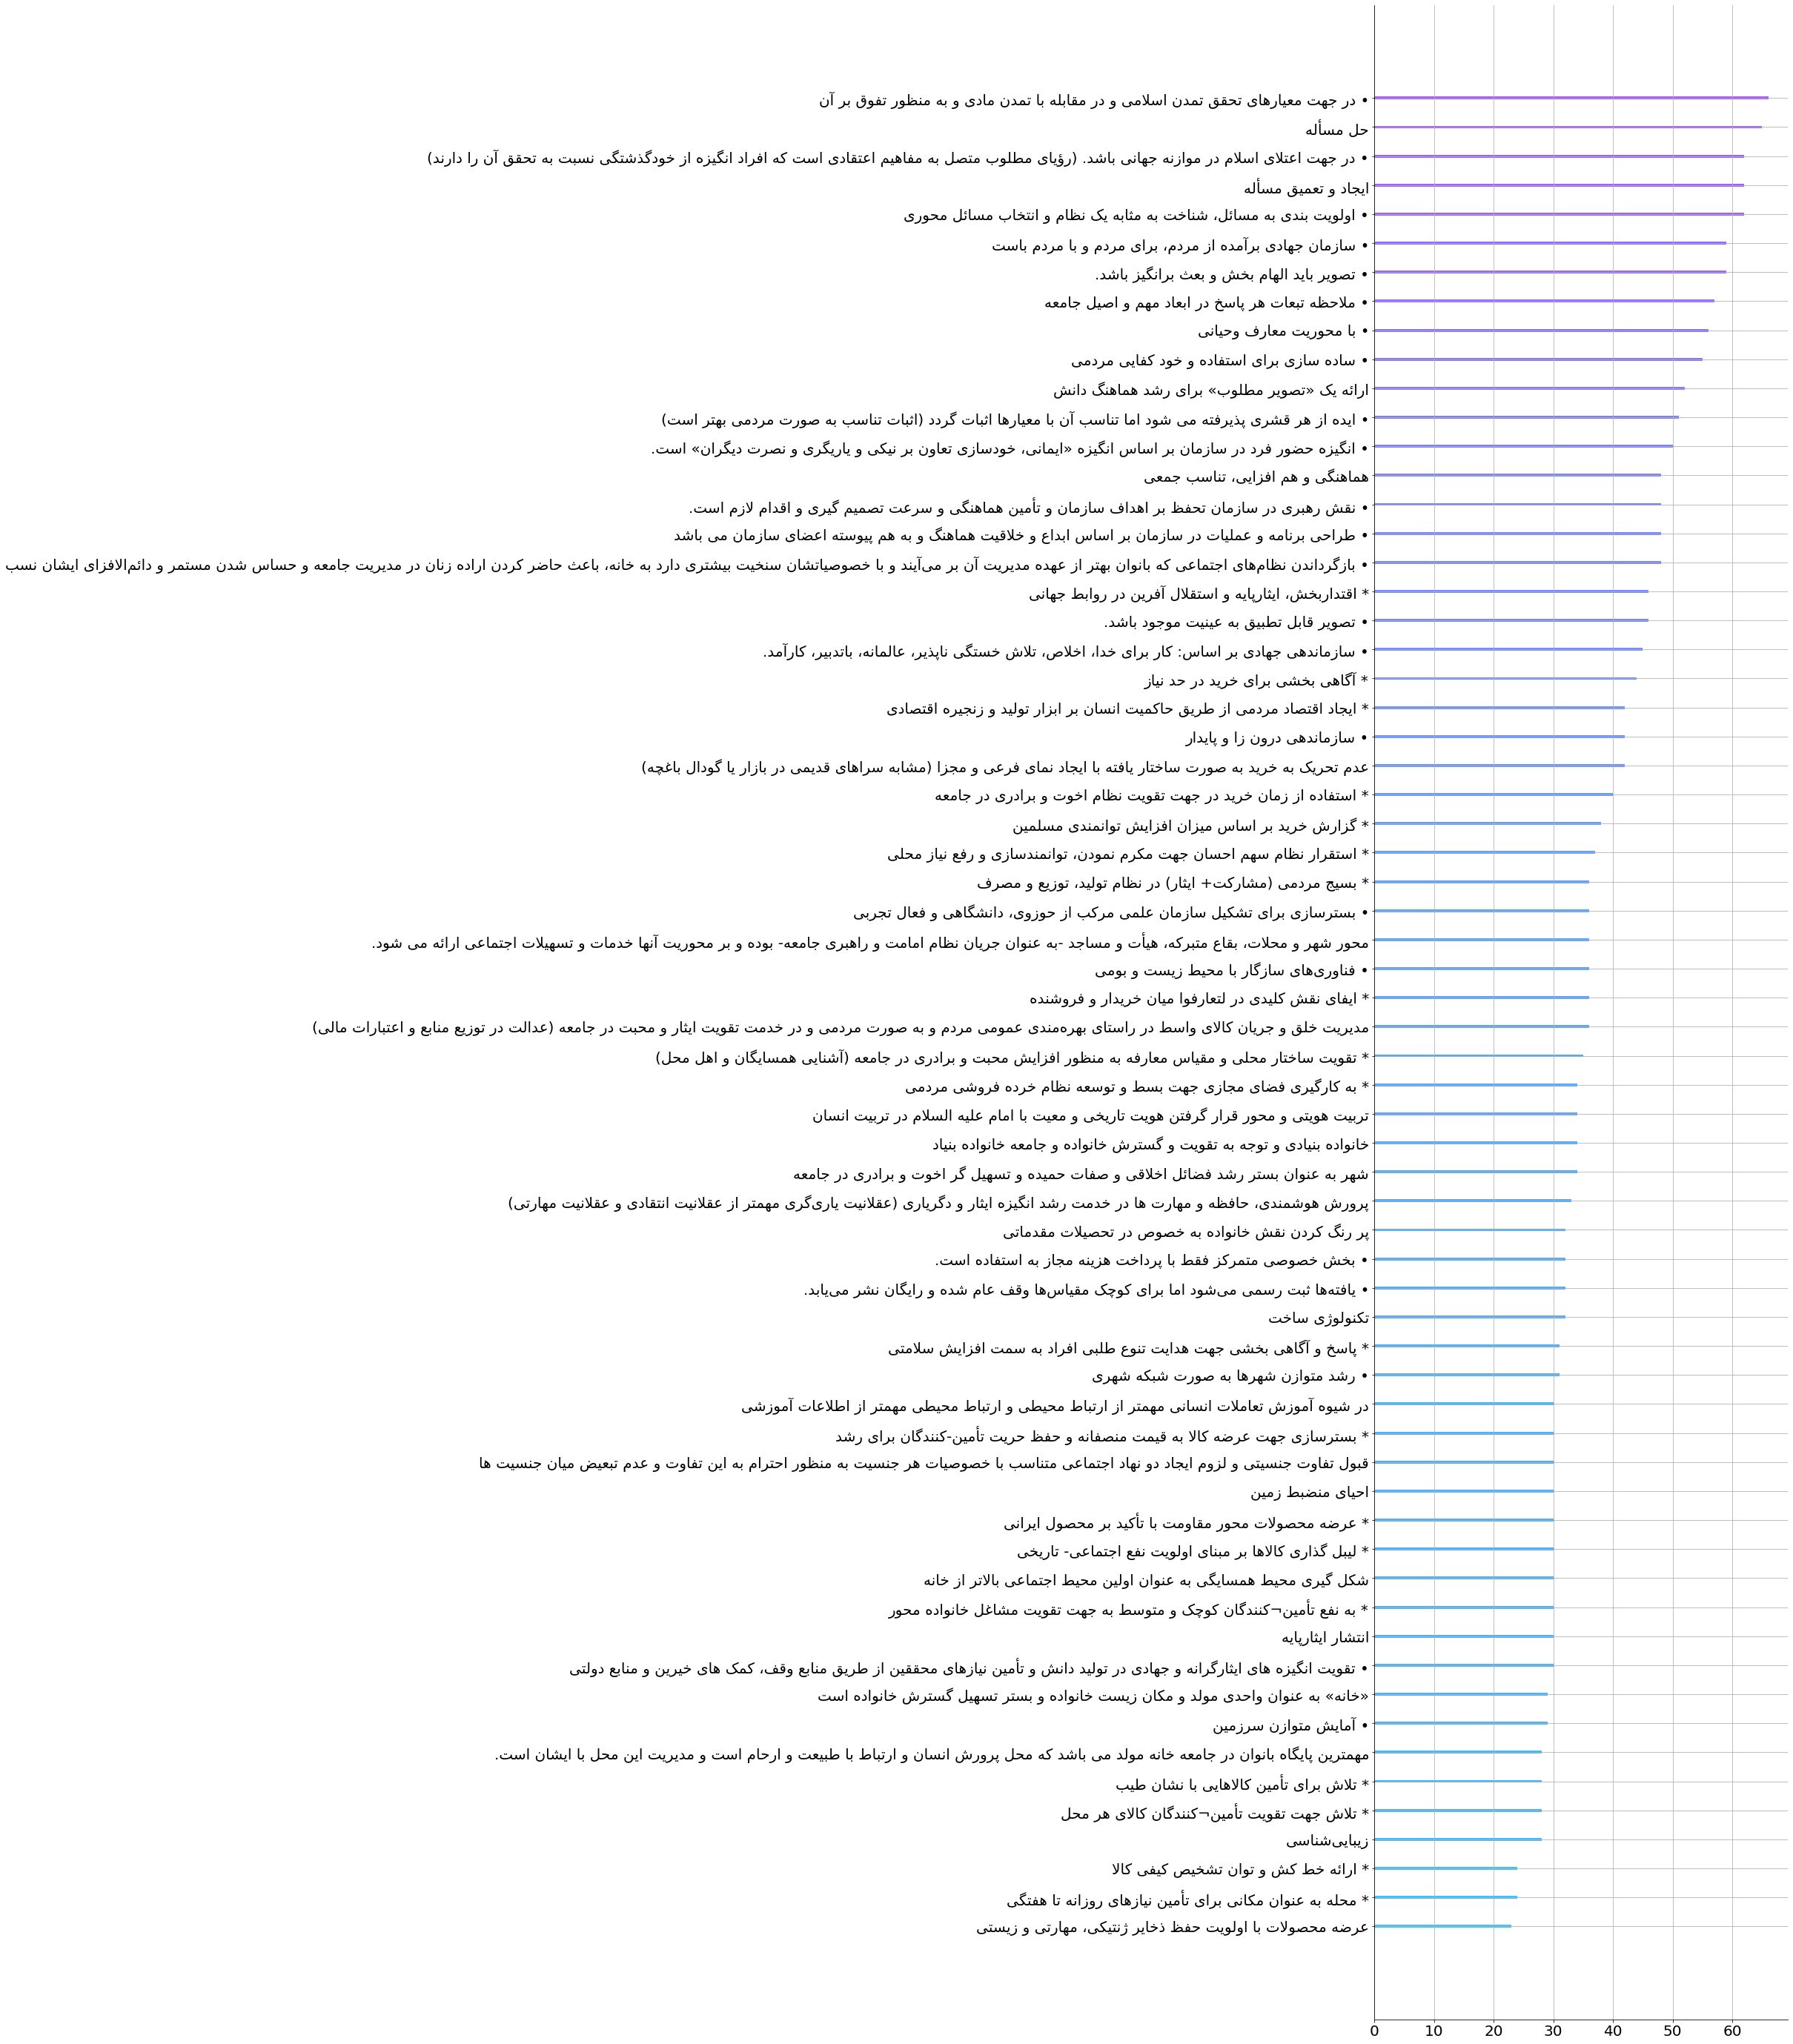

In [14]:
# نمایش پاسخها 
from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 


inds = np.argsort(avg)
l = [get_display(arabic_reshaper.reshape(l[0][:200])) for l in list_of_measures[:64]]
l = [l[i] for i in inds]
v = np.sort(avg)

colors = []
cmap = get_cmap('cool')
for decimal in v:
    colors.append(cmap(decimal/100))


fig, ax = plt.subplots(figsize=(10,50))

hbars = ax.barh(range(64), v, color=colors, height=.1)
ax.set_yticks(range(64))
_ = ax.set_yticklabels(l)
ax.spines[['right', 'top']].set_visible(False)
plt.grid()